In [127]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [128]:
def showImages(imgs, names, width=10, height=10):
    # changing the size of canvas
    plt.rcParams['figure.figsize'] = [width, height] 

    plot = 130
    for i in range(len(imgs)):
        plot += 1
        plt.subplot(plot), plt.imshow(imgs[i], cmap='gray'), plt.title(names[i])
    plt.tight_layout()
    plt.show()


In [129]:
def laplacianMask(shape):
    # mask with 2 planes because we have real and imaginary values in filter
    # mask = np.zeros((shape[0], shape[1], 2), dtype='float32')
    mask = np.zeros((shape[0], shape[1], 2), dtype='float32')
    M = shape[0] # width
    N = shape[1] # height

    for i in range(M):
        for j in range(N):
            mask[i][j] = -((i-M/2)**2 + (j-N/2)**2) #! try swapping m and n
    return mask

In [130]:
if __name__ == '__main__':
    img = cv2.imread('car.jpg',0)
    img_float32 = np.float32(img)

In [131]:
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT) 
    # dft = np.fft.fft2(img_float32) #! remove this

    dft_shift = np.fft.fftshift(dft)
    # image_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

In [132]:
    mask = laplacianMask(img.shape)
    
    # apply mask and inverse DFT
    fshift = dft_shift*mask

    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift) 
    
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    # normalize values back to 0-255 range
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

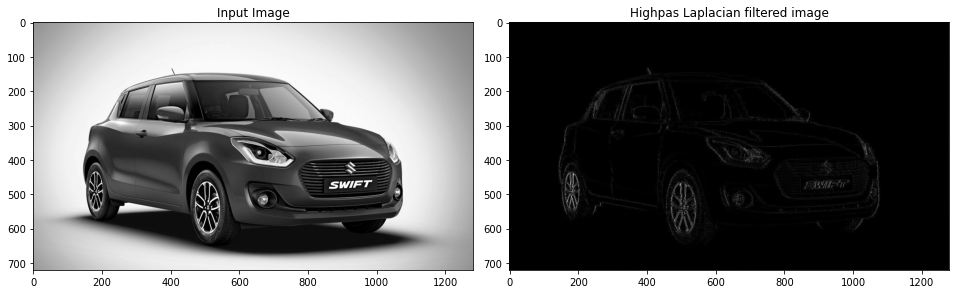

In [134]:
    showImages([img, img_back], ['Input Image', 'Highpas Laplacian filtered image'], 20, 10)